# Limpeza de Dados - Exercícios

Resolva os exercícios propostos abaixo. Os exercícios usam um dataset de reclamações registradas por cidadãos. O detaset foi derivado de dados do [Portal de Dados Abertos da Prefeitura de Curitiba](https://www.curitiba.pr.gov.br/DADOSABERTOS/).

## Leitura e análise inicial dos dados

Inicie um DataFrame a partir do arquivo `2017-02-01_156_-_Base_de_Dados_sample.csv`. Exiba algumas linhas e informações sobre os tipos identificados automaticamente pelo Pandas.

**Dica:** Caso o arquivo não seja separado por vírgulas, o Pandas não conseguirá reconhecer os campos adequadamente. Você precisará fornecer o parâmetro `sep=';'` para indicar o separador correto (neste caso, o `;`).

**Dica:** Aplicativos modernos tendem a armazenar arquivos no formato UTF-8, mas é comum encontrar arquivos codificados em outros formatos. Caso você tenha problemas para ler o arquivo, utilize o parâmetro `encoding='latin-1'` para selecionar o encoding correto (*latin-1* neste exemplo).

In [16]:
# Resposta:
#importação de bibliotecas
import pandas as pd

# lê o arquivo CSV
df = pd.read_csv('../data/2017-02-01_156_-_Base_de_Dados_sample.csv', sep=';', encoding='latin-1')

Visualize algumas linhas de dados:

In [17]:
# Resposta:
df.head()

,SOLICITACAO,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL
0,6669771,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,09/11/2016,21:02:44,ABORDAGEM SOCIAL DE RUA - ADULTO,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,ABORDAGEM SOCIAL DE RUA - ADULTO - PESSOAS/FAM...,"ANDRE DE BARROS, 0",CENTRO,Unidade Regional Matriz,NENHUM,NÃO SOUBE INFORMAR NUMERAÇÃO PREDIAL,M,NaN,NaN,NaN,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Abordagem realizada. Pessoa foi orientada quan...
1,6718351,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,27/12/2016,00:40:04,ABORDAGEM SOCIAL DE RUA - ADULTO,PERDIDA/DESORIENTADA,ABORDAGEM SOCIAL DE RUA - ADULTO - PERDIDA/DES...,"NILO CAIRO, 0",CENTRO,Unidade Regional Matriz,NENHUM,"NÃO SOUBE INFORMAR NUMERAÇÃO PREDIAL, RELATA E...",M,NaN,NaN,NaN,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
2,6702371,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,07/12/2016,14:09:42,ABORDAGEM SOCIAL DE RUA - CRIANÇA,ALCOOLIZADAS/DROGADAS,ABORDAGEM SOCIAL DE RUA - CRIANÇA - ALCOOLIZAD...,"VISCONDE DE NACAR, 1210",CENTRO,Unidade Regional Matriz,NENHUM,NaN,F,NaN,NaN,NaN,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"- EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A..."
3,6718692,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,27/12/2016,13:28:27,ABORDAGEM SOCIAL DE RUA - ADULTO,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,ABORDAGEM SOCIAL DE RUA - ADULTO - PESSOAS/FAM...,"MARECHAL DEODORO, 0",CENTRO,Unidade Regional Matriz,NENHUM,NaN,M,NaN,NaN,NaN,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,A pessoa da solicitação já foi abordada nesta ...
4,6704503,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,09/12/2016,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,DORMINDO/CAÍDAS NA RUA,ABORDAGEM SOCIAL DE RUA - ADULTO - DORMINDO/CA...,"MARECHAL DEODORO, 0",CENTRO,Unidade Regional Matriz,NENHUM,NÃO SOUBE INFORMAR NUMERAÇÃO PREDIAL.,M,NaN,NaN,04/06/1997,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,A pessoa da solicitação já faz parte da rede d...


Use o método `info` para exibir as colunas e os tipos identificados.

In [18]:
# Resposta:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013 entries, 0 to 7012
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SOLICITACAO       7013 non-null   int64 
 1   TIPO              7013 non-null   object
 2   ORGAO             7013 non-null   object
 3   DATA              7013 non-null   object
 4   HORARIO           7013 non-null   object
 5   ASSUNTO           7013 non-null   object
 6   SUBDIVISAO        7013 non-null   object
 7   DESCRICAO         7013 non-null   object
 8   LOGRADOURO_ASS    7013 non-null   object
 9   BAIRRO_ASS        7013 non-null   object
 10  REGIONAL_ASS      7011 non-null   object
 11  MEIO_RESPOSTA     7013 non-null   object
 12  OBSERVACAO        3786 non-null   object
 13  SEXO              7013 non-null   object
 14  BAIRRO_CIDADAO    6897 non-null   object
 15  REGIONAL_CIDADAO  6757 non-null   object
 16  DATA_NASC         6889 non-null   object
 17  TIPO_CIDADAO  

Estamos interessados apenas nos seguintes campos: 'DATA', 'HORARIO', 'ASSUNTO', 'BAIRRO_ASS', 'SEXO', 'DATA_NASC', 'RESPOSTA_FINAL'

Crie (ou substitua) um DataFrame contendo apenas os campos acima.

In [19]:
# Resposta:
df2 = df[['DATA', 'HORARIO', 'ASSUNTO', 'BAIRRO_ASS', 'SEXO', 'DATA_NASC', 'RESPOSTA_FINAL']]
df2

,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL
0,09/11/2016,21:02:44,ABORDAGEM SOCIAL DE RUA - ADULTO,CENTRO,M,NaN,Abordagem realizada. Pessoa foi orientada quan...
1,27/12/2016,00:40:04,ABORDAGEM SOCIAL DE RUA - ADULTO,CENTRO,M,NaN,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
2,07/12/2016,14:09:42,ABORDAGEM SOCIAL DE RUA - CRIANÇA,CENTRO,F,NaN,"- EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A..."
3,27/12/2016,13:28:27,ABORDAGEM SOCIAL DE RUA - ADULTO,CENTRO,M,NaN,A pessoa da solicitação já foi abordada nesta ...
4,09/12/2016,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,CENTRO,M,04/06/1997,A pessoa da solicitação já faz parte da rede d...
...,...,...,...,...,...,...,...
7008,28/11/2016,13:04:25,DRENAGEM,CIDADE INDUSTRIAL,M,14/04/1968,SEM POSSIBILIDADE DE ATENDIMENTO FACE SUSPENSÃ...
7009,22/12/2016,10:11:15,TRÂNSITO,JUVEVE,M,18/05/1989,"Informamos que encaminhamos a viatura 430, às ..."
7010,26/11/2016,21:03:07,ABORDAGEM SOCIAL DE RUA - CRIANÇA,SAO FRANCISCO,F,25/11/1977,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
7011,03/11/2016,15:54:31,NOVO MOBILIÁRIO URBANO,PRADO VELHO,F,15/03/1982,"Prezada cidadã, informamos que a sua solicitaç..."


## Localizando e tratando valores inválidos

Exiba todas as linhas com valores em branco (*NaN*).

In [20]:
# Resposta:
df2[df2.isna().any(axis=1)]

,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL
0,09/11/2016,21:02:44,ABORDAGEM SOCIAL DE RUA - ADULTO,CENTRO,M,NaN,Abordagem realizada. Pessoa foi orientada quan...
1,27/12/2016,00:40:04,ABORDAGEM SOCIAL DE RUA - ADULTO,CENTRO,M,NaN,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
2,07/12/2016,14:09:42,ABORDAGEM SOCIAL DE RUA - CRIANÇA,CENTRO,F,NaN,"- EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A..."
3,27/12/2016,13:28:27,ABORDAGEM SOCIAL DE RUA - ADULTO,CENTRO,M,NaN,A pessoa da solicitação já foi abordada nesta ...
6,17/12/2016,16:06:04,TRÂNSITO,CENTRO,M,NaN,Informamos que o atendimento aos pedidos para ...
...,...,...,...,...,...,...,...
6966,07/11/2016,21:40:23,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,SITIO CERCADO,F,NaN,24 - SOLICITAÇÃO ATENDIDA EM DOMICÍLIO E ENCER...
6967,08/12/2016,10:29:23,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,CAPAO RASO,M,NaN,24 - SOLICITAÇÃO ATENDIDA EM DOMICÍLIO E ENCER...
6968,10/01/2017,10:36:48,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,CIDADE INDUSTRIAL,M,NaN,23 - SOLICITAÇÃO ATENDIDA EM DOMICÍLIO E ENCER...
6969,05/12/2016,10:48:33,ATENDIMENTO SOCIAL EM DOMICÍLIO - CRIANÇA,CIDADE INDUSTRIAL,F,NaN,24 - SOLICITAÇÃO ATENDIDA EM DOMICÍLIO E ENCER...


Exclua todas as linhas que contenham algum valor nulo (*NaN*). Verifique se todas as linhas com valores em branco foram excluídas corretamente.

In [21]:
# Resposta:
df_sem_nulos = df2.dropna()

df_sem_nulos

,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL
4,09/12/2016,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,CENTRO,M,04/06/1997,A pessoa da solicitação já faz parte da rede d...
5,12/11/2016,02:29:24,ABORDAGEM SOCIAL DE RUA - ADULTO,CENTRO,M,29/12/1971,A pessoa da solicitação já faz parte da rede d...
7,11/01/2017,12:11:12,CRM-AF/SMS,SAO FRANCISCO,F,04/08/1957,Alendronato de sódio 70 mg e Carbonato de cálc...
8,14/12/2016,10:19:29,CRM-AF/SMS,SAO FRANCISCO,F,18/08/1938,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...
9,06/12/2016,19:01:01,ABORDAGEM SOCIAL DE RUA - ADULTO,CENTRO,M,13/02/1980,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
...,...,...,...,...,...,...,...
7008,28/11/2016,13:04:25,DRENAGEM,CIDADE INDUSTRIAL,M,14/04/1968,SEM POSSIBILIDADE DE ATENDIMENTO FACE SUSPENSÃ...
7009,22/12/2016,10:11:15,TRÂNSITO,JUVEVE,M,18/05/1989,"Informamos que encaminhamos a viatura 430, às ..."
7010,26/11/2016,21:03:07,ABORDAGEM SOCIAL DE RUA - CRIANÇA,SAO FRANCISCO,F,25/11/1977,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
7011,03/11/2016,15:54:31,NOVO MOBILIÁRIO URBANO,PRADO VELHO,F,15/03/1982,"Prezada cidadã, informamos que a sua solicitaç..."


Faça com que todos os nomes de bairros fiquem em letras minúsculas.

In [22]:
# Resposta:
df_sem_nulos['BAIRRO_ASS'] = df_sem_nulos['BAIRRO_ASS'].str.lower()
df_sem_nulos

/tmp/ipykernel_93512/2924786130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_nulos['BAIRRO_ASS'] = df_sem_nulos['BAIRRO_ASS'].str.lower()


,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL
4,09/12/2016,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,04/06/1997,A pessoa da solicitação já faz parte da rede d...
5,12/11/2016,02:29:24,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,29/12/1971,A pessoa da solicitação já faz parte da rede d...
7,11/01/2017,12:11:12,CRM-AF/SMS,sao francisco,F,04/08/1957,Alendronato de sódio 70 mg e Carbonato de cálc...
8,14/12/2016,10:19:29,CRM-AF/SMS,sao francisco,F,18/08/1938,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...
9,06/12/2016,19:01:01,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,13/02/1980,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
...,...,...,...,...,...,...,...
7008,28/11/2016,13:04:25,DRENAGEM,cidade industrial,M,14/04/1968,SEM POSSIBILIDADE DE ATENDIMENTO FACE SUSPENSÃ...
7009,22/12/2016,10:11:15,TRÂNSITO,juveve,M,18/05/1989,"Informamos que encaminhamos a viatura 430, às ..."
7010,26/11/2016,21:03:07,ABORDAGEM SOCIAL DE RUA - CRIANÇA,sao francisco,F,25/11/1977,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
7011,03/11/2016,15:54:31,NOVO MOBILIÁRIO URBANO,prado velho,F,15/03/1982,"Prezada cidadã, informamos que a sua solicitaç..."


## Conversão de tipos, criação de coluna e escrita em CSV

Exiba os tipos das colunas do DataFrame.

In [23]:
# Resposta:
df_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6886 entries, 4 to 7012
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATA            6886 non-null   object
 1   HORARIO         6886 non-null   object
 2   ASSUNTO         6886 non-null   object
 3   BAIRRO_ASS      6886 non-null   object
 4   SEXO            6886 non-null   object
 5   DATA_NASC       6886 non-null   object
 6   RESPOSTA_FINAL  6886 non-null   object
dtypes: object(7)
memory usage: 430.4+ KB


- Converta os campos de data para o formato DateTime. 
- Crie uma nova coluna chamada HORA, contendo apenas o componete hora do horário da reclamação (dica: use os comandos str.split e str.get)
- Converta a coluna HORA para Inteiro

In [24]:
# Resposta:

# Converta os campos de data para o formato DateTime. 
df_sem_nulos['DATA'] = pd.to_datetime(df_sem_nulos['DATA'], format='%d/%m/%Y')

# Crie uma nova coluna chamada HORA, contendo apenas o componete hora do horário da reclamação
df_sem_nulos['HORA'] = df_sem_nulos['HORARIO'].str.split(':').str.get(0)

# Converta a coluna HORA para Inteiro
df_sem_nulos['HORA'] = df_sem_nulos['HORA'].astype(int)

/tmp/ipykernel_93512/652370707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_nulos['DATA'] = pd.to_datetime(df_sem_nulos['DATA'], format='%d/%m/%Y')
/tmp/ipykernel_93512/652370707.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_nulos['HORA'] = df_sem_nulos['HORARIO'].str.split(':').str.get(0)
/tmp/ipykernel_93512/652370707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [25]:
df_sem_nulos

,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,HORA
4,2016-12-09,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,04/06/1997,A pessoa da solicitação já faz parte da rede d...,1
5,2016-11-12,02:29:24,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,29/12/1971,A pessoa da solicitação já faz parte da rede d...,2
7,2017-01-11,12:11:12,CRM-AF/SMS,sao francisco,F,04/08/1957,Alendronato de sódio 70 mg e Carbonato de cálc...,12
8,2016-12-14,10:19:29,CRM-AF/SMS,sao francisco,F,18/08/1938,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...,10
9,2016-12-06,19:01:01,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,13/02/1980,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",19
...,...,...,...,...,...,...,...,...
7008,2016-11-28,13:04:25,DRENAGEM,cidade industrial,M,14/04/1968,SEM POSSIBILIDADE DE ATENDIMENTO FACE SUSPENSÃ...,13
7009,2016-12-22,10:11:15,TRÂNSITO,juveve,M,18/05/1989,"Informamos que encaminhamos a viatura 430, às ...",10
7010,2016-11-26,21:03:07,ABORDAGEM SOCIAL DE RUA - CRIANÇA,sao francisco,F,25/11/1977,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",21
7011,2016-11-03,15:54:31,NOVO MOBILIÁRIO URBANO,prado velho,F,15/03/1982,"Prezada cidadã, informamos que a sua solicitaç...",15


Crie uma coluna chamada `IDADE` contendo a diferença entre o ano da reclamação e o ano de nascimento da pessoa.

**Dica:** Para extrair o ano de uma coluna do tipo data, use a propriedade `dt.year`. Por exemplo: `df['DATA'].dt.year`.

In [26]:
# Resposta:
df_sem_nulos['DATA_NASC'] = pd.to_datetime(df_sem_nulos['DATA_NASC'], format='%d/%m/%Y')

df_sem_nulos['IDADE'] = df_sem_nulos['DATA'].dt.year - df_sem_nulos['DATA_NASC'].dt.year
df_sem_nulos['IDADE']

/tmp/ipykernel_93512/1838535746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_nulos['DATA_NASC'] = pd.to_datetime(df_sem_nulos['DATA_NASC'], format='%d/%m/%Y')
/tmp/ipykernel_93512/1838535746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_nulos['IDADE'] = df_sem_nulos['DATA'].dt.year - df_sem_nulos['DATA_NASC'].dt.year


4       19
5       45
7       60
8       78
9       36
        ..
7008    48
7009    27
7010    39
7011    34
7012    30
Name: IDADE, Length: 6886, dtype: int32

Verifique se as colunas foram corretamente convertidas para os tipos corretos.

In [27]:
# Resposta:
df_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6886 entries, 4 to 7012
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATA            6886 non-null   datetime64[ns]
 1   HORARIO         6886 non-null   object        
 2   ASSUNTO         6886 non-null   object        
 3   BAIRRO_ASS      6886 non-null   object        
 4   SEXO            6886 non-null   object        
 5   DATA_NASC       6886 non-null   datetime64[ns]
 6   RESPOSTA_FINAL  6886 non-null   object        
 7   HORA            6886 non-null   int64         
 8   IDADE           6886 non-null   int32         
dtypes: datetime64[ns](2), int32(1), int64(1), object(5)
memory usage: 511.1+ KB


Identifique outliers na coluna `IDADE`. Remova do DataFrame todas as reclamações de pessoas com idades muito baixas.

<Axes: >

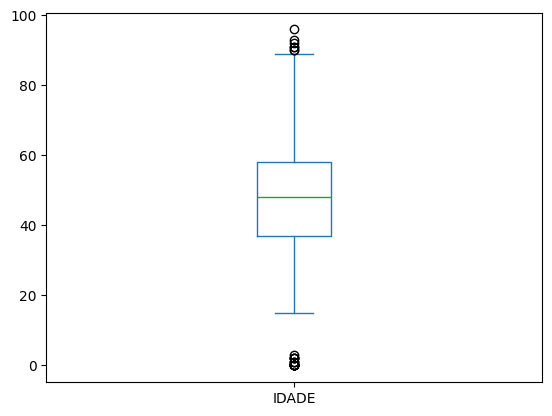

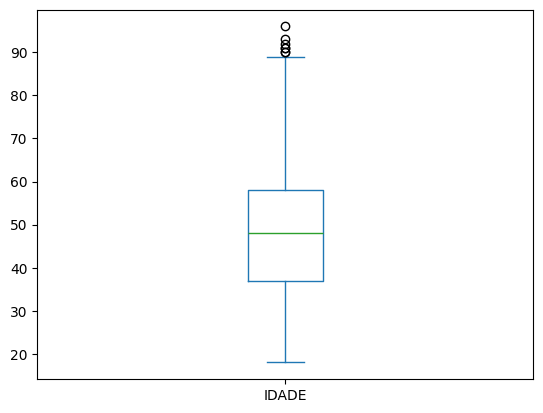

In [28]:
# Resposta:

df_sem_nulos[['IDADE']].plot.box()

df_sem_nulos2 = df_sem_nulos[df_sem_nulos['IDADE'] >= 18]

df_sem_nulos2[['IDADE']].plot.box()

Salve o DataFrame em um arquivo CSV chamado `../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv`. Use o parâmetro `index=False` para não incluir o índice no aquivo gerado.

In [29]:
# Resposta:
#df.to_csv('../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv', index=False)